<a href="https://colab.research.google.com/github/GurinderPSingh/practical_Machine_Learning/blob/main/Homework_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework

1. Choose 4 hyperparameters we have learned about in class
2. Create lists of the different options of hyperparameters
3. Randomly sample from those lists and train a Keras model on Fashion - MNIST
4. Display the different loss and accuracy curves using matplotlib
** train at least 10 different models

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

► Model 1: lr=0.01, bs=64, opt=sgd, dropout=0.6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



► Model 2: lr=0.01, bs=32, opt=sgd, dropout=0.2

► Model 3: lr=0.001, bs=32, opt=rmsprop, dropout=0.6

► Model 4: lr=0.001, bs=32, opt=sgd, dropout=0.4

► Model 5: lr=0.001, bs=32, opt=adam, dropout=0.4

► Model 6: lr=0.01, bs=64, opt=rmsprop, dropout=0.6

► Model 7: lr=0.01, bs=64, opt=sgd, dropout=0.4

► Model 8: lr=0.0001, bs=64, opt=rmsprop, dropout=0.2

► Model 9: lr=0.01, bs=64, opt=adam, dropout=0.6

► Model 10: lr=0.0001, bs=32, opt=adam, dropout=0.2


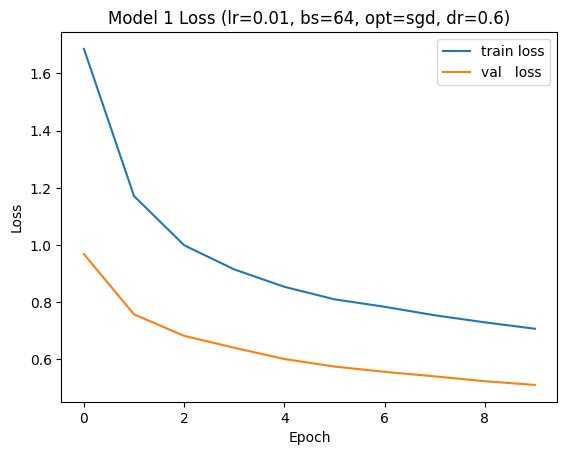

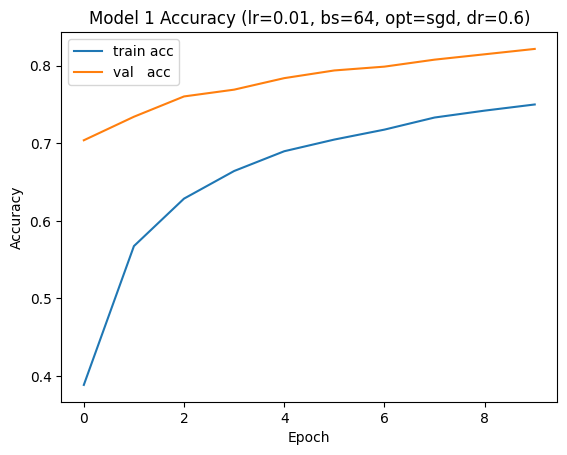

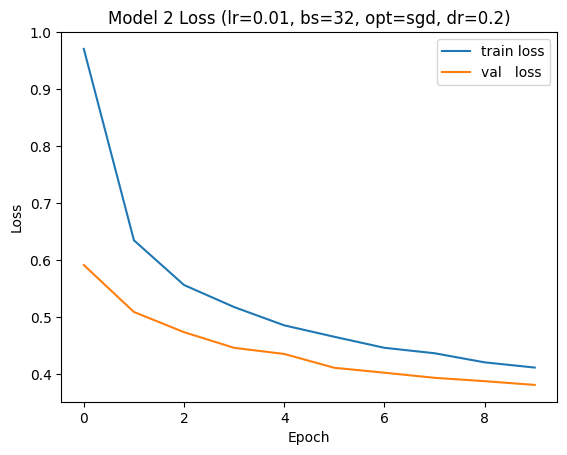

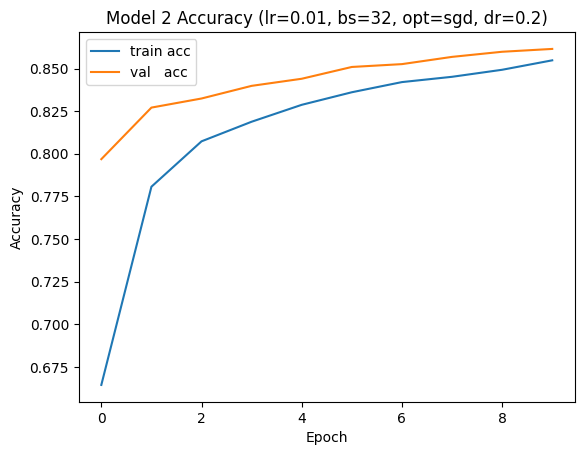

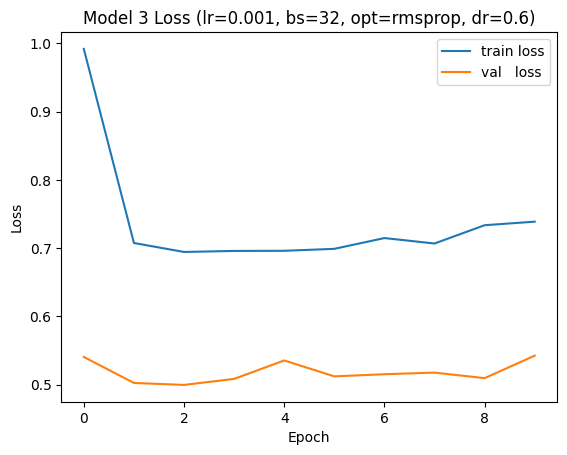

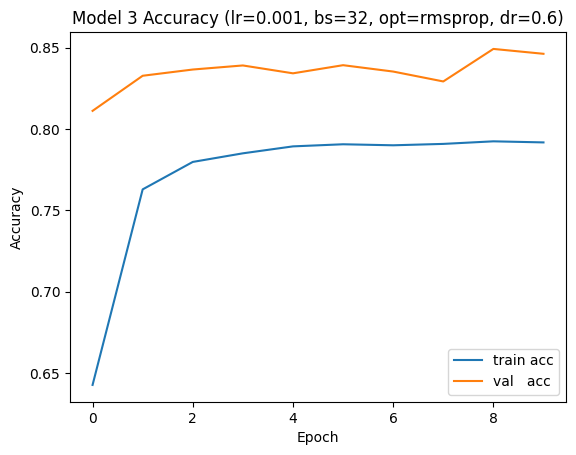

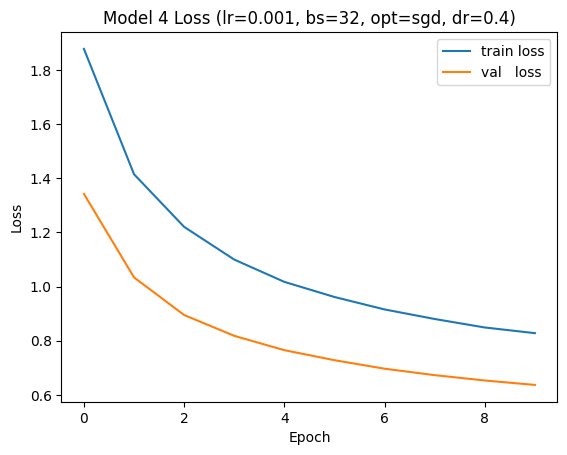

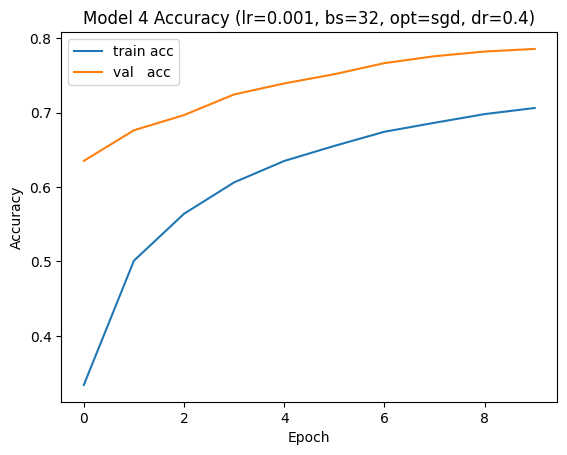

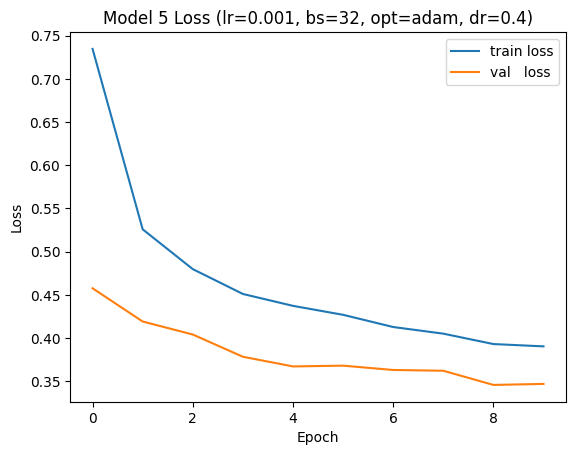

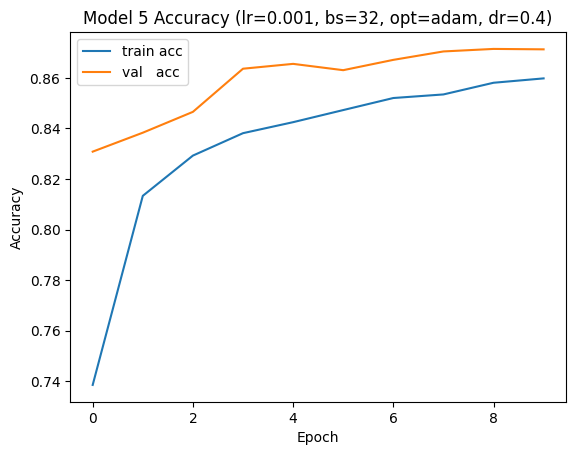

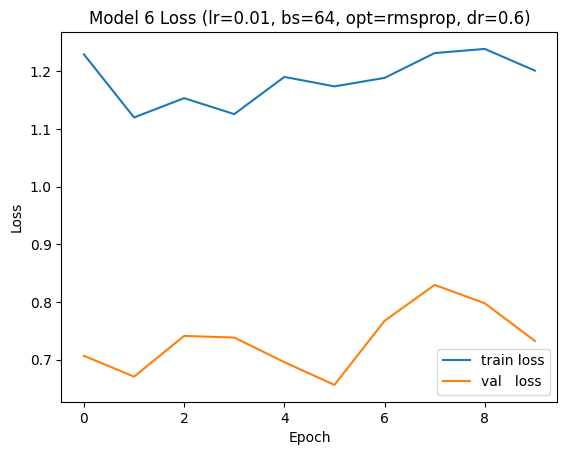

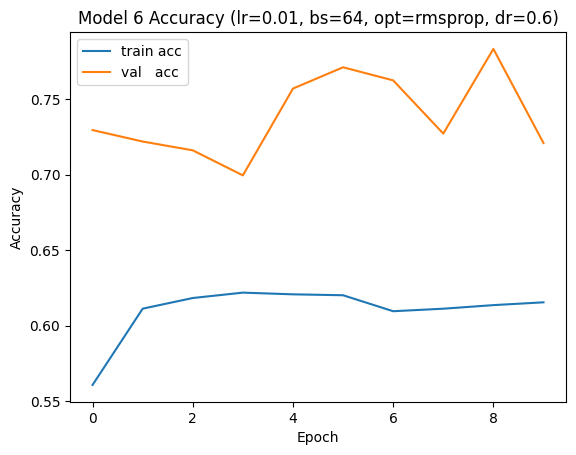

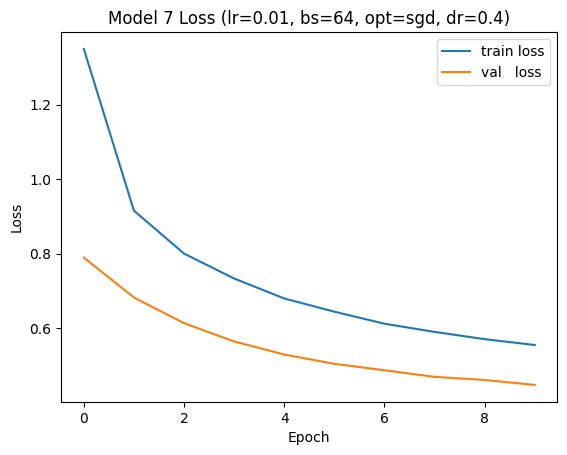

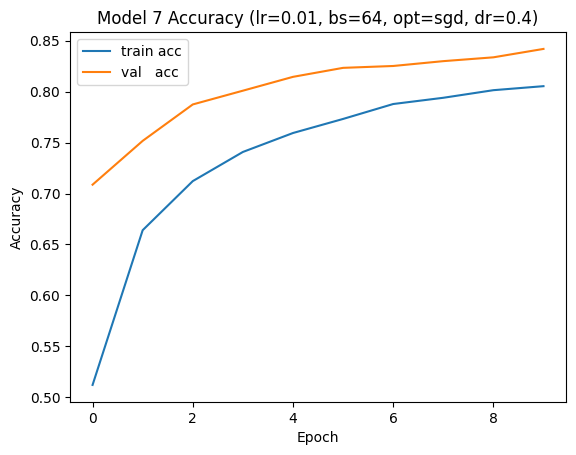

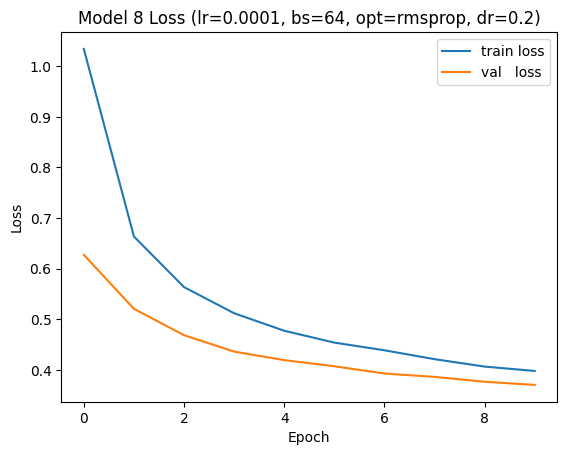

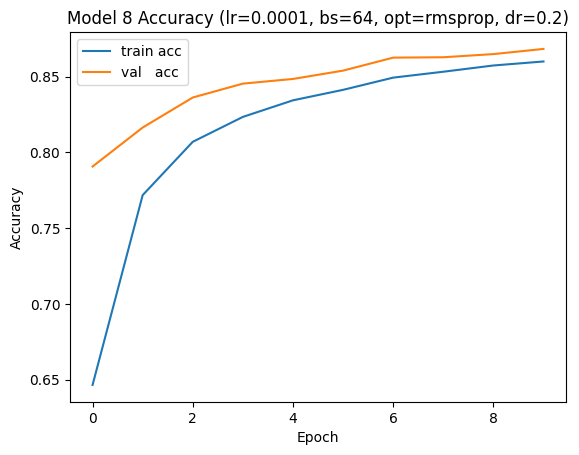

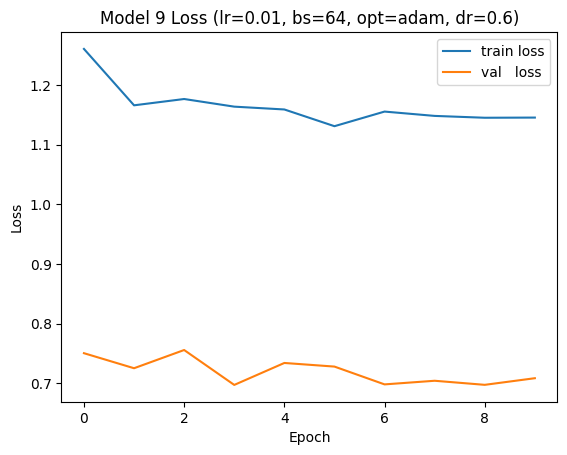

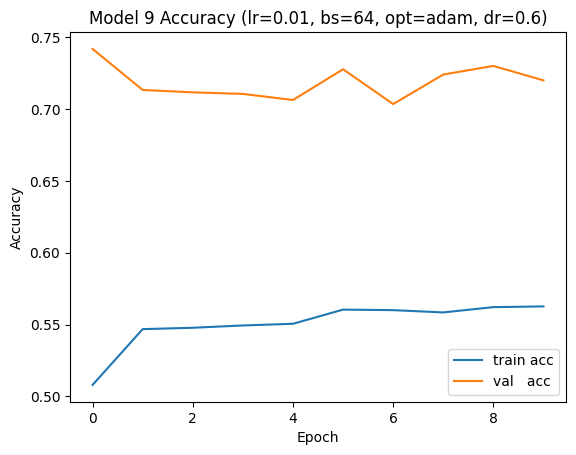

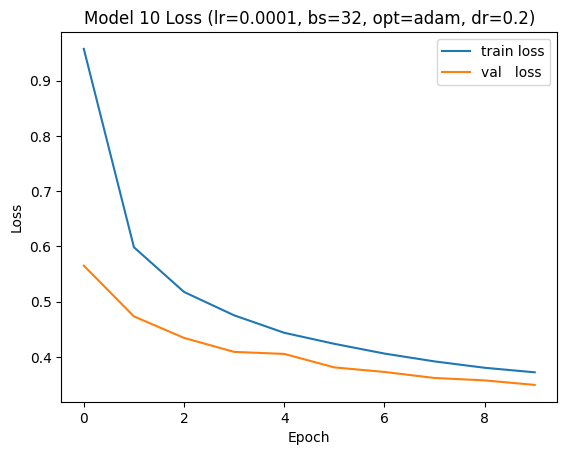

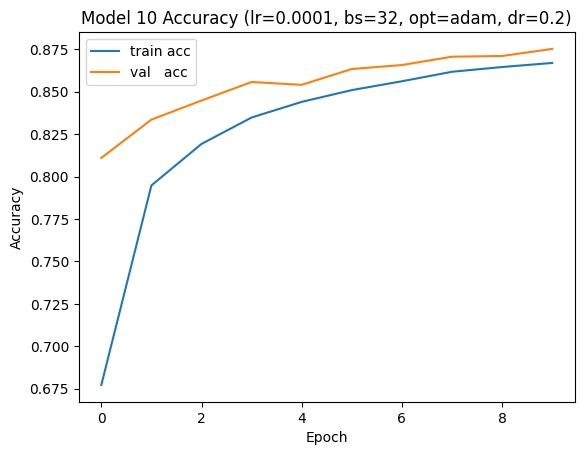

In [16]:
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

# ─────────────────────────────────────────────────────────────
# 1) Load & preprocess Fashion-MNIST
# ─────────────────────────────────────────────────────────────
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32')  / 255.0
X_train = np.expand_dims(X_train, -1)   # now shape = (n, 28, 28, 1)
X_test  = np.expand_dims(X_test,  -1)

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

# ─────────────────────────────────────────────────────────────
# 2) Define 4 hyperparameter lists
# ─────────────────────────────────────────────────────────────
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes    = [32, 64, 128]
optimizers     = ['adam', 'sgd', 'rmsprop']
dropouts       = [0.2, 0.4, 0.6]

# ─────────────────────────────────────────────────────────────
# 3) Randomly sample 10 different combinations
# ─────────────────────────────────────────────────────────────
all_configs = list(itertools.product(
    learning_rates, batch_sizes, optimizers, dropouts
))
random.seed(42)
sampled_configs = random.sample(all_configs, k=10)

# ─────────────────────────────────────────────────────────────
# 4) Model-building function
# ─────────────────────────────────────────────────────────────
def build_model(lr, opt_name, dr):
    model = keras.models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dr),
        layers.Dense(64,  activation='relu'),
        layers.Dropout(dr),
        layers.Dense(num_classes, activation='softmax'),
    ])
    if opt_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif opt_name == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=lr)
    else:  # rmsprop
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ─────────────────────────────────────────────────────────────
# 5) Train ≥10 models & collect histories
# ─────────────────────────────────────────────────────────────
histories = []
for idx, (lr, bs, opt_name, dr) in enumerate(sampled_configs, start=1):
    print(f"\n► Model {idx}: lr={lr}, bs={bs}, opt={opt_name}, dropout={dr}")
    model = build_model(lr, opt_name, dr)
    h = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=bs,
        validation_split=0.2,
        verbose=0
    )
    histories.append((idx, lr, bs, opt_name, dr, h.history))

# ─────────────────────────────────────────────────────────────
# 6) Plot loss & accuracy curves for each model
# ─────────────────────────────────────────────────────────────
for idx, lr, bs, opt_name, dr, hist in histories:
    # Loss
    plt.figure()
    plt.plot(hist['loss'],     label='train loss')
    plt.plot(hist['val_loss'], label='val   loss')
    plt.title(f"Model {idx} Loss (lr={lr}, bs={bs}, opt={opt_name}, dr={dr})")
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend(); plt.show()

    # Accuracy
    plt.figure()
    plt.plot(hist['accuracy'],      label='train acc')
    plt.plot(hist['val_accuracy'],  label='val   acc')
    plt.title(f"Model {idx} Accuracy (lr={lr}, bs={bs}, opt={opt_name}, dr={dr})")
    plt.xlabel('Epoch'); plt.ylabel('Accuracy')
    plt.legend(); plt.show()
